<a href="https://colab.research.google.com/github/hmezer/dai-project/blob/main/explanatory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/hmezer/dai-project

Cloning into 'dai-project'...
remote: Enumerating objects: 240, done.
remote: Counting objects: 100% (90/90), done.
remote: Compressing objects: 100% (86/86), done.
remote: Total 240 (delta 40), reused 4 (delta 4), pack-reused 150 (from 1)
Receiving objects: 100% (240/240), 131.74 MiB | 18.91 MiB/s, done.
Resolving deltas: 100% (107/107), done.


In [3]:
# extract the zip content at dai-project/data/nasdaq-sentiment.zip
!unzip -o dai-project/data/extracted_data_all.zip -d dai-project/data/extracted-data/

Archive:  dai-project/data/extracted_data_all.zip
 extracting: dai-project/data/extracted-data/chunk_3_batch_23.jsonl  
 extracting: dai-project/data/extracted-data/chunk_3_batch_26.jsonl  
 extracting: dai-project/data/extracted-data/chunk_8_batch_89.jsonl  
 extracting: dai-project/data/extracted-data/chunk_4_batch_16.jsonl  
 extracting: dai-project/data/extracted-data/chunk_2_batch_91.jsonl  
 extracting: dai-project/data/extracted-data/chunk_2_batch_20.jsonl  
 extracting: dai-project/data/extracted-data/chunk_1_batch_43.jsonl  
 extracting: dai-project/data/extracted-data/chunk_7_batch_33.jsonl  
 extracting: dai-project/data/extracted-data/chunk_9_batch_82.jsonl  
 extracting: dai-project/data/extracted-data/chunk_8_batch_99.jsonl  
 extracting: dai-project/data/extracted-data/chunk_10_batch_89.jsonl  
 extracting: dai-project/data/extracted-data/chunk_9_batch_6.jsonl  
 extracting: dai-project/data/extracted-data/chunk_7_batch_76.jsonl  
 extracting: dai-project/data/extracted-

In [4]:
# import the *.jsonl objects from the directory
import glob
import json
import pandas as pd

dir = "dai-project/data/extracted-data/"
files = glob.glob(dir + "*.jsonl")
dfs = []
for file in files:
    df = pd.read_json(file, lines=True)
    dfs.append(df)
df = pd.concat(dfs)
print(df.shape)
df.head()

(133993, 5)


,ticker,date,polarity_diluted,polarity_pure,polarity_immediate
0,PG,2008-02-11,0.390270,0.975675,0
1,F,2008-02-11,0.289680,0.684697,0
2,DLR,2008-02-11,0.207422,0.700050,0
3,CAR,2008-02-11,0.000000,0.000000,0
4,IHR,2008-02-11,0.062187,0.456037,0


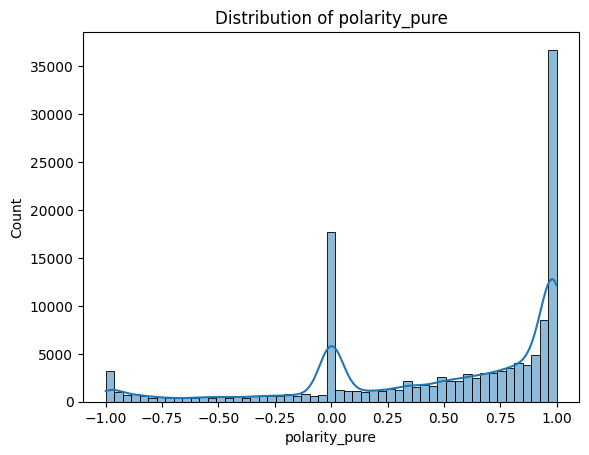

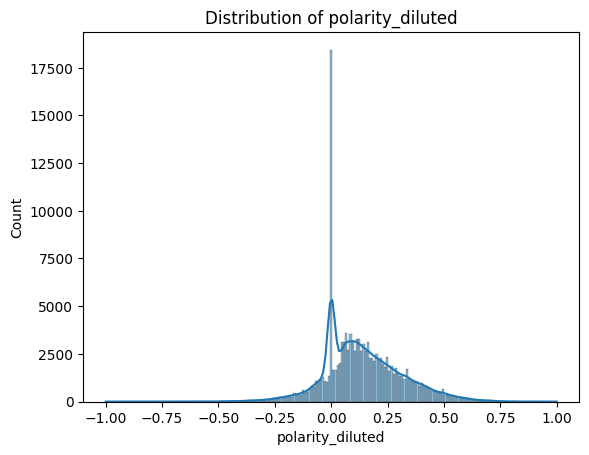

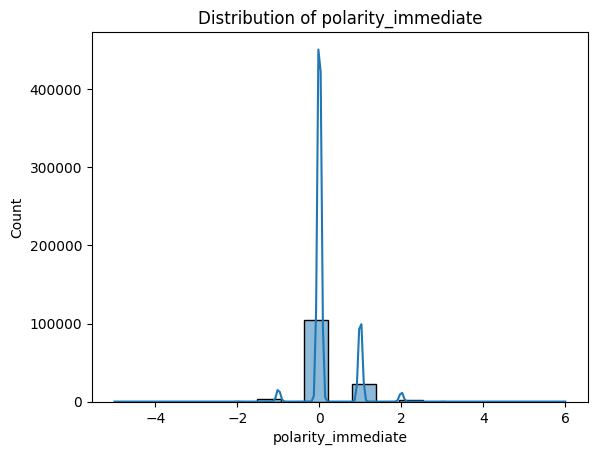

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

for col in ['polarity_pure', 'polarity_diluted', 'polarity_immediate']:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

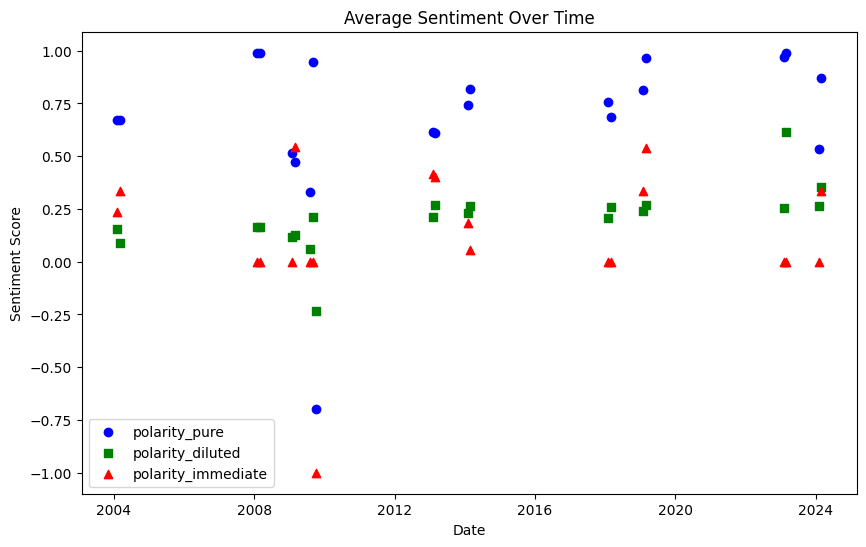

In [7]:
import matplotlib.pyplot as plt

# Assuming df_monthly is already defined as in your code
# and has a DateTimeIndex

plt.figure(figsize=(10,6))

for col, marker, color in zip(
    ['polarity_pure', 'polarity_diluted', 'polarity_immediate'],
    ['o', 's', '^'],
    ['blue', 'green', 'red']
):
    plt.scatter(df_monthly.index, df_monthly[col], label=col, marker=marker, color=color)

plt.title('Average Sentiment Over Time')
plt.ylabel('Sentiment Score')
plt.xlabel('Date')
plt.legend()
plt.show()

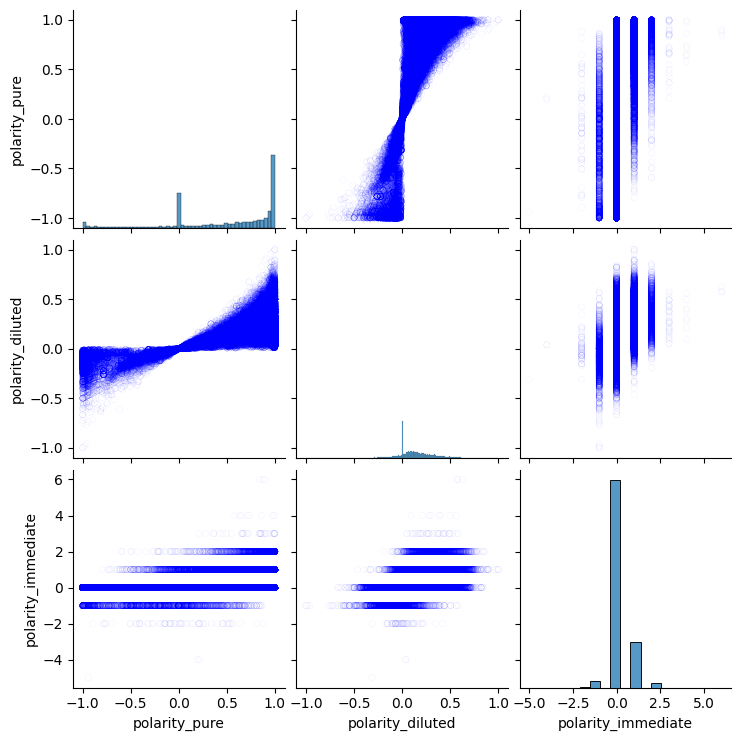

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(
    df[['polarity_pure', 'polarity_diluted', 'polarity_immediate']],
    kind='scatter',
    diag_kind='hist',
    plot_kws={
        'marker': 'o',           # circle marker
        'facecolors': 'none',    # hollow inside
        'edgecolors': 'b',       # blue edge
        's': 20,                 # size
        'linewidths': 0.1,       # thin edge
        'alpha': 0.2             # semi-transparent
    }
)
plt.show()

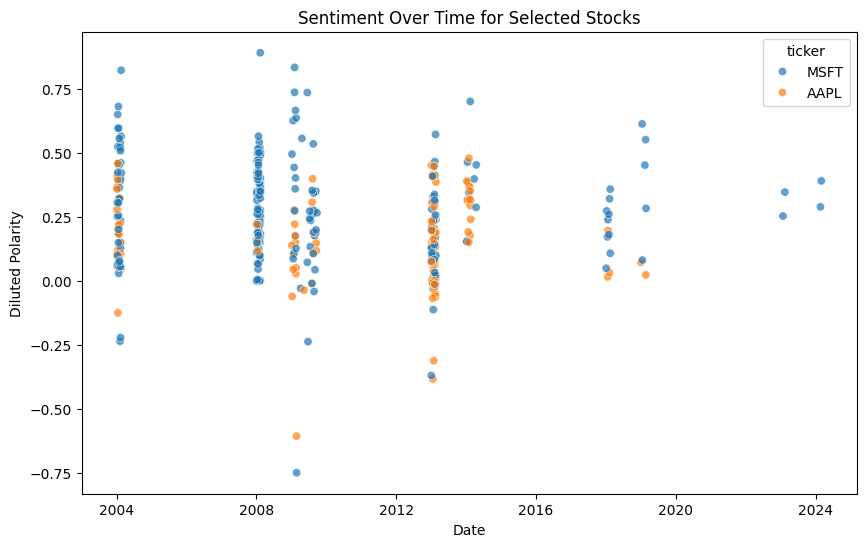

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

tickers = ['AAPL', 'MSFT']
df_subset = df[df['ticker'].isin(tickers)]

plt.figure(figsize=(10,6))
sns.scatterplot(x='date', y='polarity_diluted', hue='ticker', data=df_subset, alpha=0.7)
plt.title('Sentiment Over Time for Selected Stocks')
plt.xlabel('Date')
plt.ylabel('Diluted Polarity')
plt.show()